<a href="https://colab.research.google.com/github/Sumit-kumar23/Data-Science-Projects/blob/main/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.cluster import KMeans

In [2]:
data_segmentation=pd.read_csv('segmentation_data.csv', index_col=0)

In [15]:
data_segmentation.corr()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1.0, 'correlation figure')

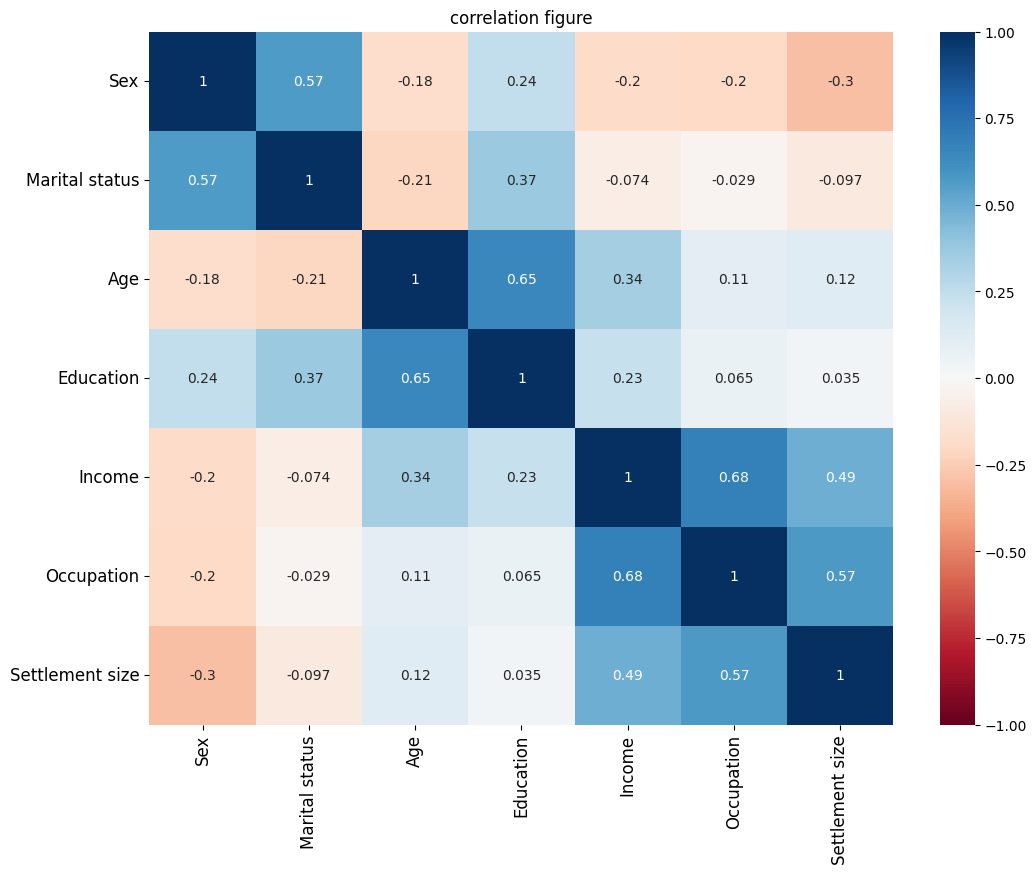

In [4]:
plt.figure(figsize=(12, 9))
s=sns.heatmap(data_segmentation.corr(),
             annot=True,
             cmap='RdBu',
             vmin=-1,
             vmax=1,
             )
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('correlation figure')

Text(0.5, 1.0, 'Visualisation of data')

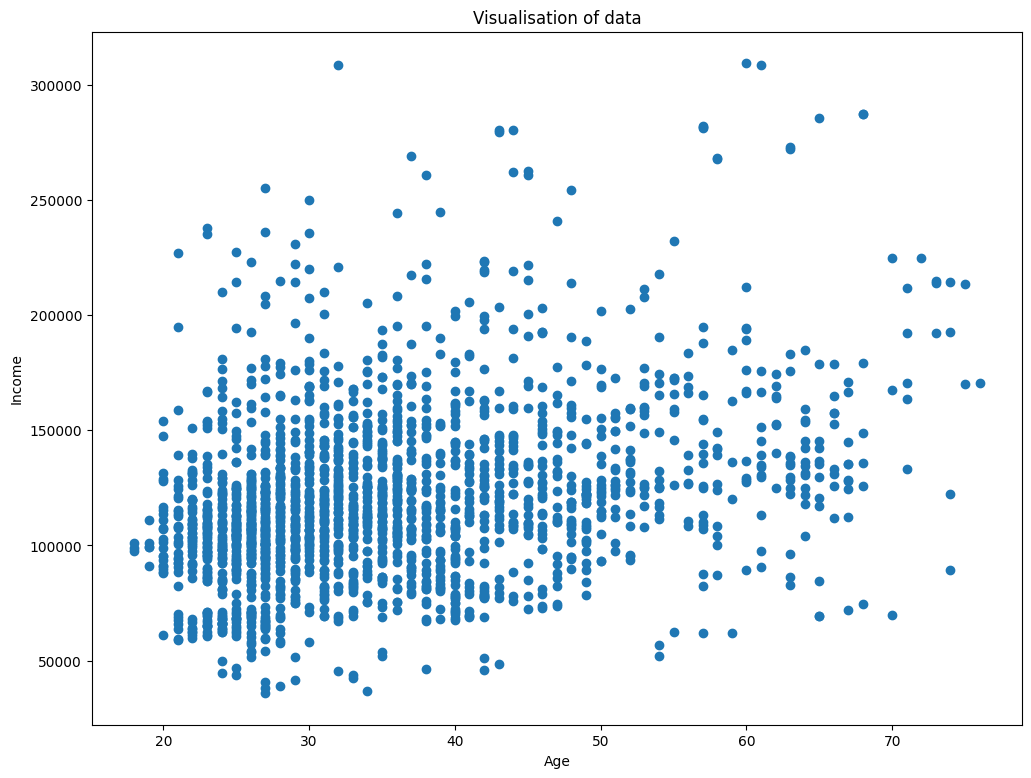

In [5]:
plt.figure(figsize=(12, 9))
plt.scatter(data_segmentation.iloc[:, 2], data_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')

plt.title('Visualisation of data')

In [19]:
scaler=pp.StandardScaler()
segmentation_scaler=scaler.fit_transform(data_segmentation)


In [7]:
hier_cluster=linkage(segmentation_scaler, method='ward')

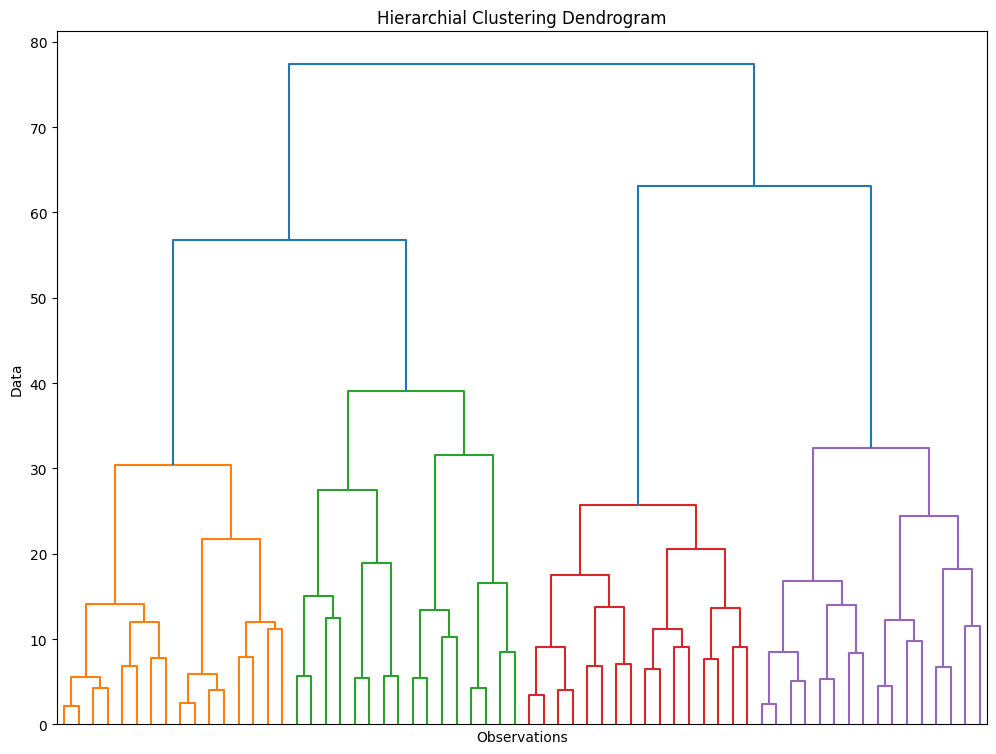

In [8]:
plt.figure(figsize=(12, 9))
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Data')
dendrogram(hier_cluster,
              truncate_mode='level',
              p=5,
              show_leaf_counts=False,
              no_labels=True,
              # color_threshold=0
          )
plt.show()

# cluster are found be checking the largest vertical line which is not cut by any horizonal line

In [9]:
# k means clustering
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_scaler)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

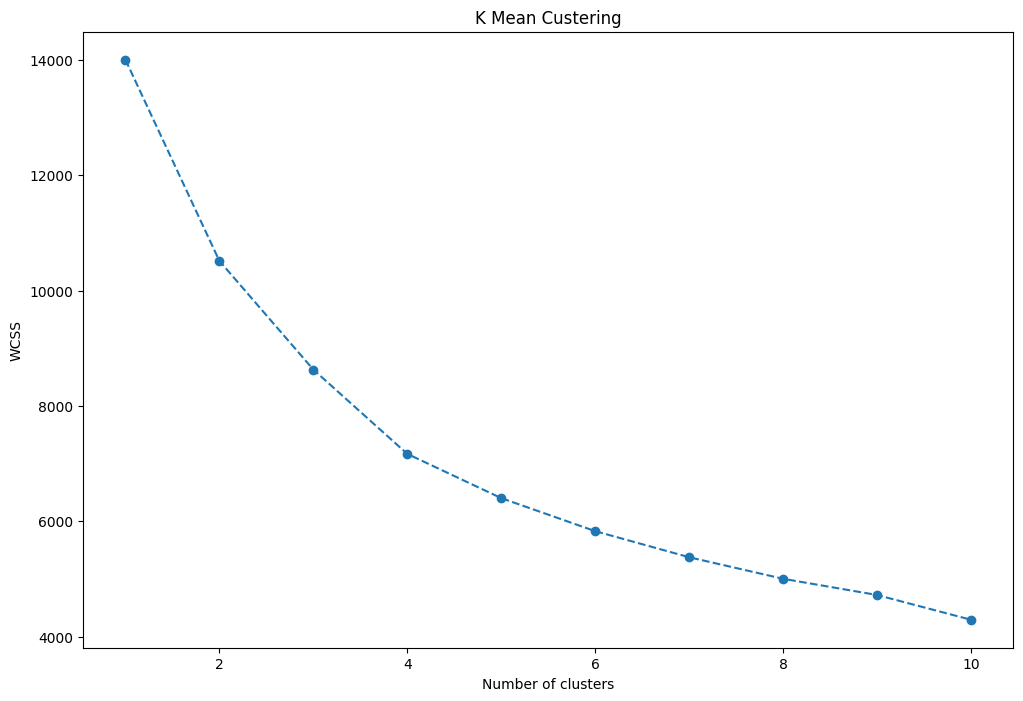

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('K Mean Custering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans=kmeans.fit(segmentation_scaler)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


RESULT

In [21]:
df_segm_kmeans=data_segmentation.copy()
df_segm_kmeans['Segment K-Means']=y_kmeans.labels_



In [22]:
df_segm_analysis=df_segm_kmeans.groupby(['Segment K-Means']).mean() # find mean for every cluster i.e. 4 clusters
df_segm_analysis


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-Means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
